In [1]:
import pandas as pd
import sqlite3 
import numpy as np

In [2]:
# Read sqlite query results into a pandas DataFrame
con = sqlite3.connect("drug_database.db")
df = pd.read_sql_query("SELECT * from drug", con)

con.close()

In [3]:
df.head()

,id,name,indication,trans_indication,dose,trans_dose,size,key
0,1,Alprazolam,"Anxiety, depression, disorder associated with ...","àìbalẹ̀ ara, ìbànújẹ́, àìsedédé ara tó níse pẹ...","Adult (250-500) micrograms, Elderly 250 microg...","Àgbàlagbà le lò 250µg lójúmọ́n, Ọ̀dómọdé le lò...",1,airorunsun
1,2,Bromazepam,"Anxiety, disorder associated with insomnia","àìbalẹ̀ ara, àìsedédé ara tó níse pẹ̀lú àìróru...","Adult (6-18) mg per day, Elderly 3mg per day ...","Ọ̀dómọdé le lò (6-18mg) lójúmọ́n, Àgbàlagbà l...",3,airorunsun
2,3,Diazepam,"Anxiety, insomnia, status epilepticus","àìbalẹ̀ ara, àìrórunsùn, dákú dájí","Adult 2 mg, Elderly 2 mg, Child ½ adult dose","Ọ̀dómọdé ati Àgbàlagbà le lò 2mg lójúmọ́n, ...","2, 5",airorunsun
3,4,Flunitrazepam,Insomnia,Àìrórunsùn,Adult (0.5-1) mg,Ọ̀dómọdé le lò (0.5-1mg),1,airorunsun
4,5,Lorazepam,"Anxiety, disorder, insomnia","àìbalẹ̀ ara, ìbànújẹ́, àìrórunsùn",Adult (2-3) mg in divided dose.,Ọ̀dómọdé le lò (2-3mg) lójúmọ́n.,1,airorunsun


In [4]:
df["key"].unique()

array(['airorunsun', 'arun opolo', None, 'owo gbigban', 'warapa',
       'arariro', 'arunmolegun', 'isan riro', 'ise abe', 'ifasimu',
       'ogbe inu', 'igbe gburu', 'airi igbe ya', 'ebi', 'ara wiwu',
       'ailera oronro ati edo', 'ikuna okan', 'airi ito to', 'eje riru',
       'aisedede okan', 'aya didun', 'aito eje', 'sejedole', 'idaraya',
       'alumoni'], dtype=object)

In [9]:
# Get unique values from df["key"]
unique_values = df["key"].unique()

# Create a mapping dictionary from unique values to unique numbers
value_to_number = {value: idx for idx, value in enumerate(unique_values)}
# Assign "airorunsun" to number 0 (or assign any other specific number if you prefer)
value_to_number['airorunsun'] = 0

# Map unique values to numbers and add a new column called "target"
df["target"] = df["key"].map(value_to_number).fillna(0).astype(int)


In [10]:
df.head(10)

,id,name,indication,trans_indication,dose,trans_dose,size,key,target
0,1,Alprazolam,"Anxiety, depression, disorder associated with ...","àìbalẹ̀ ara, ìbànújẹ́, àìsedédé ara tó níse pẹ...","Adult (250-500) micrograms, Elderly 250 microg...","Àgbàlagbà le lò 250µg lójúmọ́n, Ọ̀dómọdé le lò...",1,airorunsun,0
1,2,Bromazepam,"Anxiety, disorder associated with insomnia","àìbalẹ̀ ara, àìsedédé ara tó níse pẹ̀lú àìróru...","Adult (6-18) mg per day, Elderly 3mg per day ...","Ọ̀dómọdé le lò (6-18mg) lójúmọ́n, Àgbàlagbà l...",3,airorunsun,0
2,3,Diazepam,"Anxiety, insomnia, status epilepticus","àìbalẹ̀ ara, àìrórunsùn, dákú dájí","Adult 2 mg, Elderly 2 mg, Child ½ adult dose","Ọ̀dómọdé ati Àgbàlagbà le lò 2mg lójúmọ́n, ...","2, 5",airorunsun,0
3,4,Flunitrazepam,Insomnia,Àìrórunsùn,Adult (0.5-1) mg,Ọ̀dómọdé le lò (0.5-1mg),1,airorunsun,0
4,5,Lorazepam,"Anxiety, disorder, insomnia","àìbalẹ̀ ara, ìbànújẹ́, àìrórunsùn",Adult (2-3) mg in divided dose.,Ọ̀dómọdé le lò (2-3mg) lójúmọ́n.,1,airorunsun,0
5,6,Nitrazepam,management of insomnia,Àìrórunsùn,Adult 5 mg,Ọ̀dómọdé le lò 5mg lójúmọ́n,5,airorunsun,0
6,7,Zopiclone,"Transient, situational and chronic insomnia","Àìrórunsùn alásìkò díẹ̀, ọlọ́jọ́ pípẹ","Adult 3.75 mg, Elderly 3.75 mg Child not recom...","Ọ̀dómọdé le lò 3.75 mg, Àgbàlagbà le lò 3.75mg...",7.5,airorunsun,0
7,8,Chlorpromazine,"Psychotic disorder, mania, violent behavior, s...","àìsedédé ọpọlọ, gánangànan, ìsesí burúkú, àìba...","Adult 25mg, Elderly and Child 1/3 or ½ adult dose","Ọ̀dómọdé 25mg, Àgbàlagbà le lò 1/3 Ọ̀dómọdé, Ọ...","25, 100",arun opolo,1
8,9,None,None,None,None,None,None,None,2
9,10,Clozapine,Schizophrenia,ìsesí burúkú látàrí àrùn ọpọlọ,Elderly 12.5mg twice daily,Àgbàlagbà le lò 12.5mg ní èmejì lójúmọ́n,25,arun opolo,1


In [11]:
df.column()

AttributeError: 'DataFrame' object has no attribute 'column'

## Genarate word cloud for both indication and yoruba indication

In [7]:
#!pip install wordcloud

In [8]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

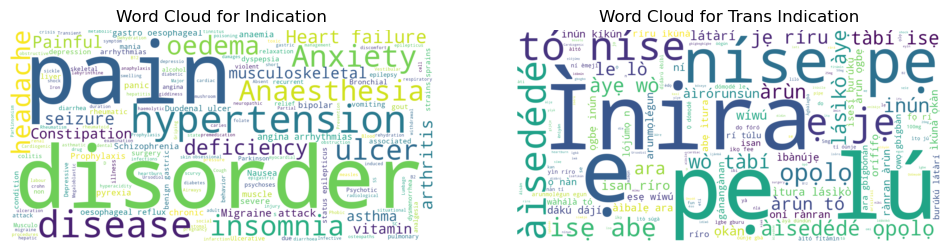

In [9]:
# Combine the text data from the 'indication' and 'trans_indication' columns
text_column1 = ' '.join(df['indication'].dropna())
text_column2 = ' '.join(df['trans_indication'].dropna())

# Generate word clouds for the specified columns
wordcloud1 = WordCloud(width=1600, height=800, background_color='white').generate(text_column1)
wordcloud2 = WordCloud(width=1600, height=800, background_color='white').generate(text_column2)

# Plot the word clouds using matplotlib
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(wordcloud1, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Indication')

plt.subplot(1, 2, 2)
plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Trans Indication')

# Show the word clouds
plt.show()


In [10]:
text = df["indication"]
text.tail(10)

114            vitamin A deficiency: measles
115              Prevention of dental caries
116                      Airways obstruction
117                      Prophylasis, asthma
118    Asthma, obstructive pulmonary disease
119                           Chronic asthma
120                         Bronchial asthma
121      Bronchial asthma, asthmatic symptom
122                      Bronchial disorder,
123            Cough, respiratory infections
Name: indication, dtype: object

## Remove All Tags, special Character and convert everything to lower case

In [11]:
# import regular expression package
import re

In [12]:
def convert_lower(text):
    if text is not None:
        return text.lower()
    else:
        return ''
    
df['indication'] = df['indication'].apply(convert_lower)



In [13]:
text = df["indication"]
text.tail(10)

114            vitamin a deficiency: measles
115              prevention of dental caries
116                      airways obstruction
117                      prophylasis, asthma
118    asthma, obstructive pulmonary disease
119                           chronic asthma
120                         bronchial asthma
121      bronchial asthma, asthmatic symptom
122                      bronchial disorder,
123            cough, respiratory infections
Name: indication, dtype: object

In [14]:
import nltk
from nltk.corpus import stopwords
#nltk.download('stopwords')
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
#nltk.download('wordnet')
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize

In [15]:
def remove_stopwords(text):
    if text is None:
        return []
    stop_words = set(stopwords.words('english'))
    words = word_tokenize(text)
    return [x for x in words if x not in stop_words]

# Assuming df["indication"] contains text data in your DataFrame
df["indication"] = df["indication"].apply(remove_stopwords)


In [16]:
def lemmatize_word(text):
  wordnet = WordNetLemmatizer()
  return " ".join([wordnet.lemmatize(word) for word in text])
df["indication"] = df["indication"].apply(lemmatize_word)

## Create, Fit and Predict all Classification Model

In [17]:
x = df['indication']
y = df['target']

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0, shuffle = True)


# Convert elements of X_train and X_test to strings
X_train = X_train.astype(str)
X_test = X_test.astype(str)

# Create a CountVectorizer to convert text data to numerical features
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)


# SVM Classifier
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train_vec, y_train)
svm_predictions = svm_classifier.predict(X_test_vec)

# Logistic Regression Classifier
lr_classifier = LogisticRegression()
lr_classifier.fit(X_train_vec, y_train)
lr_predictions = lr_classifier.predict(X_test_vec)

# Naive Bayes Classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_vec, y_train)
nb_predictions = nb_classifier.predict(X_test_vec)

# Generate Classification Reports
print("Classification Report for SVM Classifier:")
print(classification_report(y_test, svm_predictions))

print("Classification Report for Logistic Regression Classifier:")
print(classification_report(y_test, lr_predictions))

print("Classification Report for Naive Bayes Classifier:")
print(classification_report(y_test, nb_predictions))


Classification Report for SVM Classifier:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       0.38      0.75      0.50         4
           2       0.00      0.00      0.00         1
           3       0.50      0.50      0.50         2
           4       1.00      1.00      1.00         2
           5       0.00      0.00      0.00         1
           6       1.00      1.00      1.00         2
           7       0.33      1.00      0.50         2
           8       0.00      0.00      0.00         2
           9       0.00      0.00      0.00         1
          10       1.00      0.75      0.86         4
          11       0.00      0.00      0.00         1
          12       1.00      1.00      1.00         1
          13       1.00      1.00      1.00         1
          15       0.00      0.00      0.00         1
          16       0.00      0.00      0.00         2
          17       0.50      0.50      

C:\Users\TechZone\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\TechZone\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\TechZone\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\TechZone\anaconda3\Lib\site-packages\sklearn\